# Regression with Deep Neural Network (DNN)


In a regression problem, the aim is to predict the output of a continuous value, like a energy consumption, a temperature value or a probability.

This file demonstrates how to build models to predict the energy efficiency of the MAU system. To do this, you will provide the models with a description of many MAUs from that a certain period. This description includes attributes like temperature, humidity, airflow, and enthalpy.

In [4]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [6]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


## Load all MAU entrance data (1700 counts)

In [8]:
# Load entrance data
data_entrance = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/MAU_paper/interpolated_data_entrance_1700.csv', encoding='unicode_escape')
#data_entrance=pd.read_csv(r'C:\Users\Hsiao-ping.ni\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\interpolated_data_entrance_1700.csv', encoding='unicode_escape')
#data_entrance=pd.read_csv(r'C:\Users\nick8\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\interpolated_data_entrance_1700.csv', encoding='unicode_escape')
data_entrance

,ï»¿Date,Temperature (Â°F),Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
0,22-Feb-24,73.990000,31.990000,6.730000,38.080000,5.680000
1,22-Feb-24,74.116286,31.881889,6.727928,38.150347,5.679812
2,22-Feb-24,74.242572,31.773779,6.725856,38.220695,5.679623
3,22-Feb-24,74.368858,31.665668,6.723785,38.291042,5.679435
4,22-Feb-24,74.495144,31.557557,6.721713,38.361389,5.679247
...,...,...,...,...,...,...
1695,4-Apr-24,86.850863,7.938323,2.452054,36.248693,2.127534
1696,4-Apr-24,86.818147,7.941242,2.449041,36.224020,2.125650
1697,4-Apr-24,86.785431,7.944161,2.446027,36.199347,2.123767
1698,4-Apr-24,86.752716,7.947081,2.443014,36.174673,2.121883


## Load all MAU exit data (1700 counts)

In [10]:
# Load exit data
data_exit = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/MAU_paper/interpolated_data_exit_1700.csv', encoding='unicode_escape')
#data_exit=pd.read_csv(r'C:\Users\Hsiao-ping.ni\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\interpolated_data_exit_1700.csv', encoding='unicode_escape')
#data_exit=pd.read_csv(r'C:\Users\nick8\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\interpolated_data_exit_1700.csv', encoding='unicode_escape')
data_exit

,ï»¿Date,Temperature (Â°F),Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
0,22-Feb-24,75.038000,38.790000,8.400000,42.380000,7.170000
1,22-Feb-24,75.037491,38.784067,8.398870,42.376892,7.168776
2,22-Feb-24,75.036983,38.778134,8.397740,42.373785,7.167552
3,22-Feb-24,75.036474,38.772201,8.396610,42.370677,7.166327
4,22-Feb-24,75.035966,38.766268,8.395480,42.367569,7.165103
...,...,...,...,...,...,...
1695,4-Apr-24,75.180644,39.821442,8.684932,43.056098,7.396816
1696,4-Apr-24,75.180983,39.838582,8.688699,43.064573,7.400112
1697,4-Apr-24,75.181322,39.855721,8.692466,43.073049,7.403408
1698,4-Apr-24,75.181661,39.872861,8.696233,43.081524,7.406704


## Split the data into training and test sets

Now, split the dataset into a training set and a test set. You will use the test set in the final evaluation of your model.

The line of code "train_dataset = dataset.sample(frac=0.8, random_state=0)" creates a training dataset by randomly selecting 80% of the rows from the dataset, ensuring that the selection is reproducible by setting a random state. The frac=0.8 parameter specifies that 80% of the data should be sampled, and random_state=0 ensures that the random selection of rows is consistent every time the code is run, facilitating reproducible results in experiments or analyses.

The line "test_dataset = dataset.drop(train_dataset.index)" removes all rows from dataset that are already included in train_dataset, effectively creating a test dataset. This is achieved by dropping rows indexed in train_dataset.index from the original dataset. The result is a dataset containing 20% of the original data, not selected for training, used for testing model performance.

### Train datasets for MAU entrance (1360 counts)

Drop 'Count' and 'Which MAU' columns.

In [15]:
data_entrance = data_entrance.drop(['ï»¿Date'], axis=1)
train_dataset_entrance = data_entrance.sample(frac=0.8, random_state=0)
test_dataset_entrance = data_entrance.drop(train_dataset_entrance.index)
train_dataset_entrance

# Spliting data into Feature 
#X=data[['Humidity (%)','Airflow (g/m^3)','Enthalpy, h (kJ/kg)','x (g/kg)']]
#y=data['Temperature (°F)']

# Import train_test_split function
#from sklearn.model_selection import train_test_split

# Split dataset into training set and test (validation) set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 80% training and 20% test

,Temperature (Â°F),Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
678,83.466828,18.543019,5.101725,40.178534,4.394903
6,74.747716,31.341336,6.717569,38.502084,5.678870
182,88.121089,20.181583,6.567116,46.078323,5.717116
1229,85.571177,15.360730,4.133055,39.144085,2.858517
654,81.889241,20.778311,5.517593,40.126551,4.738446
...,...,...,...,...,...
732,87.016398,13.513614,4.166021,40.295497,3.621931
715,85.898941,15.096945,4.460594,40.258676,3.865274
832,86.006086,14.013467,4.320783,39.944161,3.677151
951,89.473867,13.144297,4.418676,42.106704,3.853820


### Test datasets for MAU entrance (340 counts)

In [17]:
test_dataset_entrance

,Temperature (Â°F),Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
11,75.379147,30.800783,6.707210,38.853820,5.677928
23,76.894579,29.503455,6.682348,39.697987,5.675668
24,77.020865,29.395344,6.680277,39.768334,5.675480
25,77.147151,29.287234,6.678205,39.838682,5.675291
28,77.526009,28.962902,6.671989,40.049723,5.674726
...,...,...,...,...,...
1660,87.995913,7.836145,2.557528,37.112260,2.193455
1671,87.636040,7.868258,2.524379,36.840853,2.172737
1674,87.537893,7.877016,2.515338,36.766833,2.167087
1684,87.210736,7.906210,2.485203,36.520100,2.148252


### Load original entrance data

In [19]:
# Load entrance data
ori_data_entrance = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/MAU_paper/AI_model_MAU_Entrance.csv', encoding='unicode_escape')
#ori_data_entrance=pd.read_csv(r'C:\Users\Hsiao-ping.ni\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\AI_model_MAU_Entrance.csv', encoding='unicode_escape')
#ori_data_entrance=pd.read_csv(r'C:\Users\nick8\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\AI_model_MAU_Entrance.csv', encoding='unicode_escape')
ori_data_entrance

,Count,Which MAU,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
0,1,1,73.990,31.99,6.73,38.08,5.68
1,2,2,87.400,20.51,6.51,45.55,5.66
2,3,3,88.410,20.05,6.59,46.29,5.74
3,4,4,87.370,20.35,6.45,45.39,5.60
4,5,5,87.330,20.63,6.51,45.59,5.66
5,6,9,75.540,29.08,6.44,38.33,5.46
6,7,1,80.780,22.35,5.81,40.09,4.98
7,8,1,87.760,12.46,3.97,40.32,3.46
8,9,1,85.660,14.32,4.39,39.87,3.72
9,10,3,89.650,13.09,4.42,42.21,3.86


### Original test datasets for MAU entrance (3 counts)

In [21]:
ori_test_entrance = ori_data_entrance.iloc[[5, 12, 15]]
ori_test_entrance

,Count,Which MAU,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
5,6,9,75.540,29.08,6.44,38.33,5.46
12,13,2,90.770,7.00,2.42,38.36,2.10
15,16,5,90.194,7.64,2.76,38.77,2.32


### Train datasets for MAU exit (1360 counts)

In [23]:
data_exit = data_exit.drop(['ï»¿Date'], axis=1)
train_dataset_exit = data_exit.sample(frac=0.8, random_state=0)
test_dataset_exit = data_exit.drop(train_dataset_exit.index)
train_dataset_exit

,Temperature (Â°F),Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
678,74.848285,38.351672,8.283096,41.972343,7.049247
6,75.034949,38.754403,8.393220,42.361354,7.162655
182,75.061107,39.430830,8.565580,42.721112,7.297022
1229,74.836218,38.519488,8.321648,42.058411,7.114261
654,74.864558,38.256745,8.269535,41.947481,7.037946
...,...,...,...,...,...
732,74.811670,38.565256,8.313608,42.028281,7.074673
715,74.823197,38.498016,8.304002,42.010671,7.066669
832,74.879168,38.559888,8.745951,42.098464,7.505951
951,75.066054,39.305127,8.571919,42.702631,7.293685


### Test datasets for MAU exit (340 counts)

In [25]:
test_dataset_exit

,Temperature (Â°F),Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
11,75.032406,38.724738,8.387569,42.345815,7.156533
23,75.026304,38.653543,8.374008,42.308523,7.141842
24,75.025795,38.647610,8.372878,42.305415,7.140618
25,75.025287,38.641677,8.371748,42.302307,7.139394
28,75.023761,38.623879,8.368358,42.292984,7.135721
...,...,...,...,...,...
1660,75.168778,39.221560,8.553090,42.759453,7.281454
1671,75.172507,39.410094,8.594526,42.852684,7.317710
1674,75.173524,39.461513,8.605827,42.878111,7.327599
1684,75.176915,39.632908,8.643496,42.962866,7.360559


### Load original exit data

In [27]:
# Load exit data
ori_data_exit = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/MAU_paper/AI_model_MAU_Exit.csv', encoding='unicode_escape')
#ori_data_exit=pd.read_csv(r'C:\Users\Hsiao-ping.ni\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\AI_model_MAU_Exit.csv', encoding='unicode_escape')
#ori_data_exit=pd.read_csv(r'C:\Users\nick8\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\AI_model_MAU_Exit.csv', encoding='unicode_escape')
ori_data_exit

,Count,Which MAU,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
0,1,1,75.038,38.79,8.40,42.38,7.17
1,2,2,74.984,38.16,8.28,42.05,7.04
2,3,3,75.092,39.94,8.68,42.99,7.40
3,4,4,75.020,39.08,8.48,42.52,2.22
4,5,5,75.038,38.89,8.45,42.45,7.19
5,6,9,75.110,38.80,8.45,42.50,7.19
6,7,1,74.876,38.19,8.26,41.93,7.03
7,8,1,74.804,38.61,8.32,42.04,7.08
8,9,1,74.894,38.55,8.83,42.11,7.59
9,10,3,75.074,39.34,8.56,42.73,7.28


### Original test datasets for MAU exit (3 counts)

In [29]:
ori_test_exit = ori_data_exit.iloc[[5, 12, 15]]
ori_test_exit

,Count,Which MAU,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
5,6,9,75.110,38.80,8.45,42.50,7.19
12,13,2,75.074,38.43,8.36,42.28,7.11
15,16,5,75.146,38.07,8.30,42.19,7.06


## Statistics

Let's check the overall statistics. Note how each feature covers a very different range.

.describe(): This method generates descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset's distribution, excluding NaN values. By default, it provides information such as count (number of non-missing values), mean, standard deviation (std), minimum, 25th percentile (25%), median (50th percentile), 75th percentile (75%), and maximum for numeric columns.

.transpose() or .T: This method transposes the DataFrame, swapping its rows and columns. After calling .describe(), the resulting DataFrame has the descriptive statistics as rows and the features (or columns of the original dataset) as columns. Transposing flips this layout, so the features become rows and the descriptive statistics become columns. This often makes the output more readable and easier to analyze, especially if the dataset has many features.

### Train datasets for MAU entrance

In [33]:
train_dataset_entrance.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Temperature (Â°F),1360.0,86.124192,4.036394,73.990000,84.090256,87.380406,89.129997,90.769746
Humidity (%),1360.0,16.435948,6.775283,7.004026,7.951933,15.950544,20.624067,31.990000
Density (g/m3),1360.0,4.807931,1.565589,2.421483,2.754202,4.611454,6.471748,6.730000
"Enthalpy, h (kJ/kg)",1360.0,41.004123,2.754461,36.150000,38.661074,40.203596,42.160555,46.284703
x (g/kg),1360.0,4.043720,1.352695,2.101483,2.316551,3.838311,5.609005,5.739176


### Train datasets for MAU exit

In [35]:
train_dataset_exit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature (Â°F),1360.0,75.006312,0.130806,74.516350,74.946519,75.037936,75.094092,75.182000
Humidity (%),1360.0,39.024597,0.794583,38.073214,38.568222,38.808846,39.158424,42.504285
Density (g/m3),1360.0,8.450169,0.124396,8.260494,8.347993,8.450000,8.509529,8.826186
"Enthalpy, h (kJ/kg)",1360.0,42.376201,0.271984,41.760424,42.146346,42.429285,42.558180,43.090000
x (g/kg),1360.0,6.880821,0.972392,2.240477,7.083040,7.154517,7.227363,7.585621


## Split features from labels

Separate the target value—the "label"—from the features. This label is the value that you will train the model to predict.

train_features = train_dataset.copy(): This line creates a copy of the train_dataset DataFrame and assigns it to train_features. The .copy() method ensures that the original dataset remains unchanged when modifications are made to train_features. This dataset contains the features used to train the machine learning model.

test_features = test_dataset.copy(): Similarly, this line duplicates the test_dataset DataFrame, storing the copy in test_features. This is done to preserve the original test_dataset while allowing modifications on test_features. This dataset is used to evaluate the model's performance after training.

train_labels = train_features.pop('Temperature (°F)'): The .pop() method removes the column named 'Temperature (°F)' from train_features and returns it. This removed column is then stored in train_labels. In our machine learning context, 'Temperature (°F)' is considered the target variable (or label) that the model will be trained to predict. By doing this, train_features now only contains the input features (or independent variables) for the training data, while train_labels holds the corresponding target values.

test_labels = test_features.pop('Temperature (°F)'): This line does the same operation as the previous one but for the testing dataset. It removes the 'Temperature (°F)' column from test_features and stores it in test_labels. Now, test_features only includes the input features for the testing data, and test_labels contains the corresponding target values that will be used to evaluate the model's predictive accuracy.

### Train and test features, and train and test labels for MAU entrance

In [39]:
train_features_entrance = train_dataset_entrance.copy()
test_features_entrance = test_dataset_entrance.copy()
train_labels_entrance = train_features_entrance.pop('Temperature (Â°F)')
test_labels_entrance = test_features_entrance.pop('Temperature (Â°F)')

In [40]:
# original
ori_test_features_entrance = ori_test_entrance.copy()
ori_test_labels_entrance = ori_test_features_entrance.pop('Temperature (°F)')

In [41]:
train_features_entrance

,Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
678,18.543019,5.101725,40.178534,4.394903
6,31.341336,6.717569,38.502084,5.678870
182,20.181583,6.567116,46.078323,5.717116
1229,15.360730,4.133055,39.144085,2.858517
654,20.778311,5.517593,40.126551,4.738446
...,...,...,...,...
732,13.513614,4.166021,40.295497,3.621931
715,15.096945,4.460594,40.258676,3.865274
832,14.013467,4.320783,39.944161,3.677151
951,13.144297,4.418676,42.106704,3.853820


In [42]:
test_features_entrance

,Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
11,30.800783,6.707210,38.853820,5.677928
23,29.503455,6.682348,39.697987,5.675668
24,29.395344,6.680277,39.768334,5.675480
25,29.287234,6.678205,39.838682,5.675291
28,28.962902,6.671989,40.049723,5.674726
...,...,...,...,...
1660,7.836145,2.557528,37.112260,2.193455
1671,7.868258,2.524379,36.840853,2.172737
1674,7.877016,2.515338,36.766833,2.167087
1684,7.906210,2.485203,36.520100,2.148252


In [43]:
ori_test_features_entrance = ori_test_features_entrance.drop(['Count','Which MAU'], axis=1)
ori_test_features_entrance 

,Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
5,29.08,6.44,38.33,5.46
12,7.00,2.42,38.36,2.10
15,7.64,2.76,38.77,2.32


In [44]:
train_labels_entrance

678     83.466828
6       74.747716
182     88.121089
1229    85.571177
654     81.889241
          ...    
732     87.016398
715     85.898941
832     86.006086
951     89.473867
1144    80.870029
Name: Temperature (Â°F), Length: 1360, dtype: float64

In [45]:
test_labels_entrance

11      75.379147
23      76.894579
24      77.020865
25      77.147151
28      77.526009
          ...    
1660    87.995913
1671    87.636040
1674    87.537893
1684    87.210736
1694    86.883579
Name: Temperature (Â°F), Length: 340, dtype: float64

### Train and test features, and train and test labels for MAU exit

In [47]:
train_features_exit = train_dataset_exit.copy()
test_features_exit = test_dataset_exit.copy()
train_labels_exit = train_features_exit.pop('Temperature (Â°F)')
test_labels_exit = test_features_exit.pop('Temperature (Â°F)')

In [48]:
# original
ori_test_features_exit = ori_test_exit.copy()
ori_test_labels_exit = ori_test_features_exit.pop('Temperature (°F)')

In [49]:
train_features_exit

,Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
678,38.351672,8.283096,41.972343,7.049247
6,38.754403,8.393220,42.361354,7.162655
182,39.430830,8.565580,42.721112,7.297022
1229,38.519488,8.321648,42.058411,7.114261
654,38.256745,8.269535,41.947481,7.037946
...,...,...,...,...
732,38.565256,8.313608,42.028281,7.074673
715,38.498016,8.304002,42.010671,7.066669
832,38.559888,8.745951,42.098464,7.505951
951,39.305127,8.571919,42.702631,7.293685


In [50]:
test_features_exit

,Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
11,38.724738,8.387569,42.345815,7.156533
23,38.653543,8.374008,42.308523,7.141842
24,38.647610,8.372878,42.305415,7.140618
25,38.641677,8.371748,42.302307,7.139394
28,38.623879,8.368358,42.292984,7.135721
...,...,...,...,...
1660,39.221560,8.553090,42.759453,7.281454
1671,39.410094,8.594526,42.852684,7.317710
1674,39.461513,8.605827,42.878111,7.327599
1684,39.632908,8.643496,42.962866,7.360559


In [51]:
ori_test_features_exit = ori_test_features_exit.drop(['Count','Which MAU'], axis=1)
ori_test_features_exit  

,Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
5,38.80,8.45,42.50,7.19
12,38.43,8.36,42.28,7.11
15,38.07,8.30,42.19,7.06


In [52]:
train_labels_exit

678     74.848285
6       75.034949
182     75.061107
1229    74.836218
654     74.864558
          ...    
732     74.811670
715     74.823197
832     74.879168
951     75.066054
1144    74.650603
Name: Temperature (Â°F), Length: 1360, dtype: float64

In [53]:
test_labels_exit

11      75.032406
23      75.026304
24      75.025795
25      75.025287
28      75.023761
          ...    
1660    75.168778
1671    75.172507
1674    75.173524
1684    75.176915
1694    75.180305
Name: Temperature (Â°F), Length: 340, dtype: float64

In [54]:
ori_test_labels_exit

5     75.110
12    75.074
15    75.146
Name: Temperature (°F), dtype: float64

## Regression with a deep neural network (DNN)

Here, you will implement a multiple-input DNN model.

The name "hidden" here just means not directly connected to the inputs or outputs.

This model will contain a few layers.

* The dense input layer.
* Two hidden, non-linear, `Dense` layers with the ReLU (`relu`) activation function nonlinearity.
* A linear `Dense` single-output layer.

The `compile` method is included in the `build_and_compile_model` function below.

In [58]:
def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(4,  kernel_initializer='normal', input_dim = train_features_entrance.shape[1], activation='relu'),
      layers.Dense(64,  kernel_initializer='normal', activation='relu'),
      layers.Dense(64,  kernel_initializer='normal', activation='relu'),
      layers.Dense(1)])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [59]:
# Experiment with different configurations
#configs = [
 #   {"layers": 2, "neurons_per_layer": [32, 16]},
 #   {"layers": 3, "neurons_per_layer": [64, 32, 16]},
 #   {"layers": 4, "neurons_per_layer": [128, 64, 32, 16]},
 #   {"layers": 2, "neurons_per_layer": [64, 64]},
 #   {"layers": 3, "neurons_per_layer": [128, 64, 32]}]

### Regression using a DNN and multiple inputs

In [61]:
dnn_model = build_and_compile_model()
dnn_model.summary()
dnn_model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 64)                320       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,565
Trainable params: 4,565
Non-trainable params: 0
_________________________________________________________________


This table summarizes the architecture of the neural network model. The table is divided into several columns detailing the layers in the model, their types, output shapes, and the number of parameters (weights and biases) each layer has. Here's a breakdown of the table:

Layer: Indicates the name and type of each layer in the model. The model consists of a normalization layer followed by three dense (fully connected) layers.

Output Shape: The shape of the output for each layer. The notation (None, x) indicates that the batch size is variable (denoted by None), and x is the dimensionality of the output from that layer.

The normalization layer takes an input with 9 features ((None, 9)).
The first dense layer outputs 64 units ((None, 64)).
The second dense layer, identical to the first, also outputs 64 units.
The final dense layer outputs a single unit ((None, 1)), corresponding to the model's prediction.

Param #: Lists the number of parameters in each layer, which are learned during the training process.

The normalization layer has 19 parameters, which are not trainable. These parameters might include statistics like mean and variance for each input feature used for data normalization.
The first dense layer has 640 parameters, calculated as (9 input features * 64 output units) + 64 bias terms.
The second dense layer has 4160 parameters, derived from (64 input units * 64 output units) + 64 bias terms.
The final dense layer has 65 parameters, from (64 input units * 1 output unit) + 1 bias term.

Total params: The total number of parameters in the model, summing to 4,884. This includes both trainable and non-trainable parameters.

Trainable params: The number of parameters that will be updated during training, totaling 4,865. This excludes the normalization layer's statistics.

Non-trainable params: Parameters that do not get updated during the training process, in this case, 19, likely related to the normalization layer.


Train the model with Keras `Model.fit`.

The validation_split=0.2 argument in the fit method of the Keras API indicates that 20% of the training data should be set aside for validation. The model will train on 80% of the data and evaluate its performance on the remaining 20% to monitor for issues like overfitting. This validation set is not used to update the model's weights; it's only for evaluation purposes to give an estimate of the model's performance on unseen data.

The verbose parameter controls how much information the training process outputs to the console. Setting verbose=0 means that you won’t see any logging output during training, which can be useful if you don't need to track the training process in detail and want to avoid cluttering your console.

In [64]:
%%time
history_entrance = dnn_model.fit(
    train_features_entrance,
    train_labels_entrance,
    validation_split=0.2,
    verbose=0, epochs=100)

2024-10-24 19:59:20.247647: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


CPU times: user 2.73 s, sys: 1.18 s, total: 3.91 s
Wall time: 2.51 s


In [65]:
%%time
history_exit = dnn_model.fit(
    train_features_exit,
    train_labels_exit,
    validation_split=0.2,
    verbose=0, epochs=100) 

CPU times: user 2.56 s, sys: 1.11 s, total: 3.68 s
Wall time: 2.34 s


### Visualize the model's training progress in DNN model

Visualize the model's training progress using the stats stored in the `history` object:

In [68]:
def plot_loss(history_entrance):
  plt.plot(history_entrance.history['loss'], label='Training loss')
  plt.plot(history_entrance.history['val_loss'], label='Validation loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Temperature (°F)]')
  plt.title('Training progress in DNN model for MAU entrance')
  plt.legend()
  plt.grid(True)

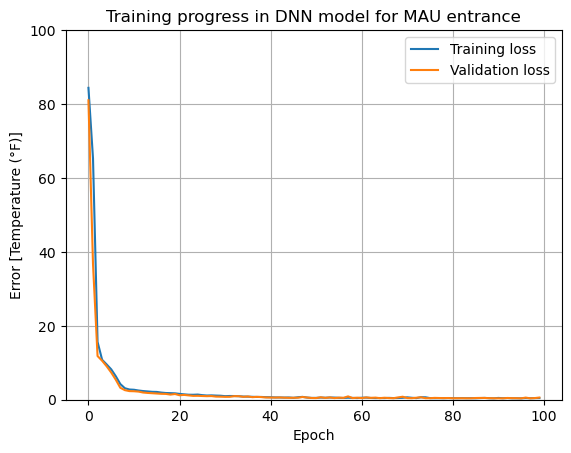

In [69]:
plot_loss(history_entrance)

In [70]:
def plot_loss(history_exit):
  plt.plot(history_exit.history['loss'], label='Training loss')
  plt.plot(history_exit.history['val_loss'], label='Validation loss')
  plt.ylim([0, 2])
  plt.xlim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Temperature (°F)]')
  plt.title('Training progress in DNN model for MAU exit')
  plt.legend()
  plt.grid(True)

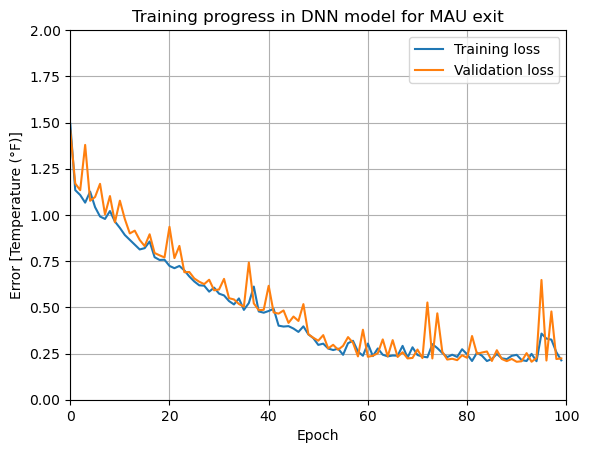

In [71]:

plot_loss(history_exit)

### Collect the results on the test set

#### MAU entrance

In [74]:
test_features_entrance = np.asarray(test_features_entrance).astype(np.float32)

In [75]:
test_results_entrance = {}
test_results_entrance['dnn_model'] = dnn_model.evaluate(test_features_entrance, test_labels_entrance, verbose=0)
test_results_entrance

{'dnn_model': 3.524531364440918}

In [76]:
#original
ori_test_features_entrance = np.asarray(ori_test_features_entrance).astype(np.float32)
ori_test_features_entrance.shape

(3, 4)

In [77]:
ori_test_results_entrance = {}
ori_test_results_entrance['dnn_model'] = dnn_model.evaluate(ori_test_features_entrance, ori_test_labels_entrance, verbose=0)
ori_test_results_entrance

{'dnn_model': 5.150083065032959}

#### MAU exit

In [79]:
test_features_exit = np.asarray(test_features_exit).astype(np.float32)

In [80]:
test_results_exit = {}
test_results_exit['dnn_model'] = dnn_model.evaluate(test_features_exit, test_labels_exit, verbose=0)
test_results_exit

{'dnn_model': 0.23299700021743774}

In [81]:
#original
ori_test_features_exit = np.asarray(ori_test_features_exit).astype(np.float32)
ori_test_features_exit.shape

(3, 4)

In [82]:
ori_test_results_exit = {}
ori_test_results_exit['dnn_model'] = dnn_model.evaluate(ori_test_features_exit, ori_test_labels_exit, verbose=0)
ori_test_results_exit

{'dnn_model': 0.11064910888671875}

## Performance

In [84]:
pd.DataFrame(test_results_entrance, index=['Mean absolute error [Temperature]']).T

,Mean absolute error [Temperature]
dnn_model,3.524531


In [85]:
# original
pd.DataFrame(ori_test_results_entrance, index=['Mean absolute error [Temperature]']).T

,Mean absolute error [Temperature]
dnn_model,5.150083


In [86]:
pd.DataFrame(test_results_exit, index=['Mean absolute error [Temperature]']).T

,Mean absolute error [Temperature]
dnn_model,0.232997


In [87]:
#original
pd.DataFrame(ori_test_results_exit, index=['Mean absolute error [Temperature]']).T

,Mean absolute error [Temperature]
dnn_model,0.110649


### Make predictions

In [89]:
test_predictions_entrance = dnn_model.predict(test_features_entrance).flatten()
test_predictions_entrance

11/11 [==============================] - 0s 417us/step


array([73.06 , 74.753, 74.894, 75.035, 75.458, 76.022, 76.163, 76.587,
       77.292, 77.574, 79.549, 80.959, 81.241, 81.665, 81.806, 83.357,
       83.639, 83.78 , 84.345, 84.627, 84.768, 85.332, 85.473, 86.46 ,
       86.541, 86.586, 86.654, 86.676, 86.732, 86.744, 86.755, 86.822,
       86.856, 86.935, 86.946, 86.969, 86.991, 87.093, 87.138, 87.16 ,
       87.183, 87.194, 87.25 , 87.273, 87.318, 87.419, 87.509, 87.532,
       87.554, 87.577, 87.622, 87.644, 87.678, 87.637, 87.574, 87.436,
       87.411, 87.285, 87.134, 87.122, 86.921, 86.908, 86.896, 86.871,
       86.758, 86.745, 86.707, 86.695, 86.632, 86.619, 86.494, 86.406,
       86.357, 86.359, 86.37 , 86.382, 86.392, 86.394, 86.448, 86.452,
       86.458, 86.466, 86.478, 86.486, 86.488, 86.508, 86.558, 86.011,
       85.882, 85.494, 84.07 , 83.553, 83.294, 82.647, 80.835, 79.411,
       78.376, 77.082, 75.788, 75.659, 75.529, 75.012, 73.588, 73.115,
       73.407, 73.455, 73.602, 73.796, 73.991, 74.04 , 74.186, 74.234,
      

In [90]:
# original
ori_test_predictions_entrance = dnn_model.predict(ori_test_features_entrance).flatten()
ori_test_predictions_entrance

1/1 [==============================] - 0s 8ms/step


array([72.82 , 84.2  , 84.034], dtype=float32)

In [91]:
test_predictions_exit = dnn_model.predict(test_features_exit).flatten()
test_predictions_exit

11/11 [==============================] - 0s 409us/step


array([74.994, 74.961, 74.958, 74.956, 74.947, 74.936, 74.934, 74.925,
       74.912, 74.906, 74.868, 74.84 , 74.835, 74.826, 74.824, 74.793,
       74.788, 74.785, 74.774, 74.769, 74.766, 74.755, 74.752, 74.733,
       74.763, 74.788, 74.826, 74.838, 74.87 , 74.876, 74.882, 74.92 ,
       74.939, 74.983, 74.989, 75.002, 75.015, 75.071, 75.097, 75.109,
       75.122, 75.128, 75.16 , 75.172, 75.197, 75.254, 75.305, 75.317,
       75.33 , 75.342, 75.368, 75.38 , 75.399, 75.38 , 75.351, 75.286,
       75.274, 75.215, 75.144, 75.139, 75.044, 75.038, 75.032, 75.021,
       74.968, 74.962, 74.944, 74.938, 74.909, 74.903, 74.844, 74.803,
       74.786, 74.788, 74.8  , 74.813, 74.825, 74.827, 74.888, 74.893,
       74.9  , 74.909, 74.923, 74.932, 74.934, 74.957, 75.014, 75.022,
       75.023, 75.025, 75.035, 75.039, 75.041, 75.045, 75.058, 75.068,
       75.075, 75.084, 75.093, 75.094, 75.095, 75.099, 75.109, 75.082,
       75.051, 75.046, 75.03 , 75.009, 74.988, 74.983, 74.967, 74.962,
      

In [92]:
# original
ori_test_predictions_exit = dnn_model.predict(ori_test_features_exit).flatten()
ori_test_predictions_exit

1/1 [==============================] - 0s 7ms/step


array([75.114, 74.947, 74.945], dtype=float32)

In [93]:
error_entrance = test_predictions_entrance - test_labels_entrance
error_entrance

11     -2.318851
23     -2.141627
24     -2.126868
25     -2.112109
28     -2.067796
          ...   
1660   -6.560480
1671   -6.626107
1674   -6.644010
1684   -6.703679
1694   -6.763347
Name: Temperature (Â°F), Length: 340, dtype: float64

In [94]:
# original
ori_error_entrance = ori_test_predictions_entrance - ori_test_labels_entrance
ori_error_entrance

5    -2.720359
12   -6.570316
15   -6.159569
Name: Temperature (°F), dtype: float64

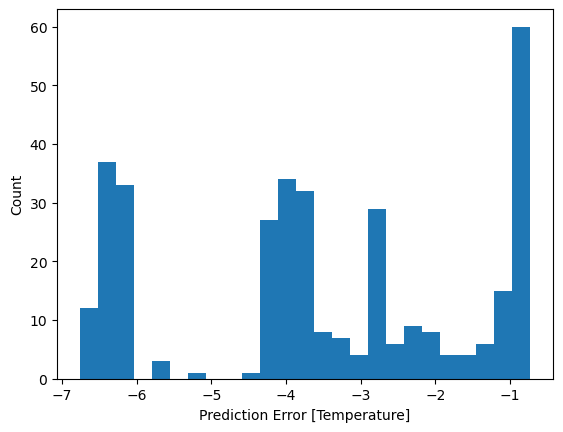

In [95]:
plt.hist(error_entrance, bins=25)

plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

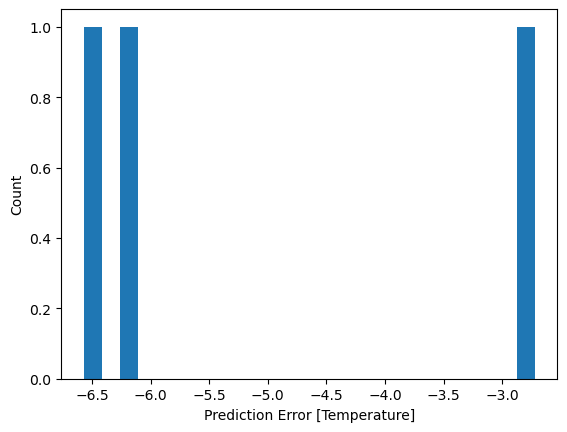

In [96]:
# original
plt.hist(ori_error_entrance, bins=25)
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

In [97]:
error_exit = test_predictions_exit - test_labels_exit
error_exit


11     -0.038288
23     -0.065198
24     -0.067429
25     -0.069682
28     -0.076411
          ...   
1660    0.150871
1671    0.208459
1674    0.224158
1684    0.276523
1694    0.328866
Name: Temperature (Â°F), Length: 340, dtype: float64

In [98]:
# original
ori_error_exit = ori_test_predictions_exit - ori_test_labels_exit
ori_error_exit

5     0.004075
12   -0.126986
15   -0.200878
Name: Temperature (°F), dtype: float64

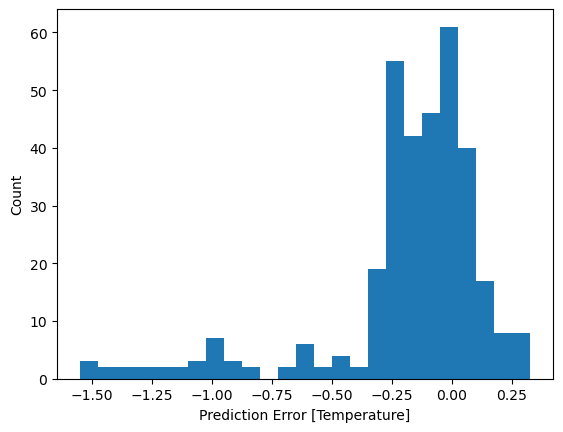

In [99]:
plt.hist(error_exit, bins=25)
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

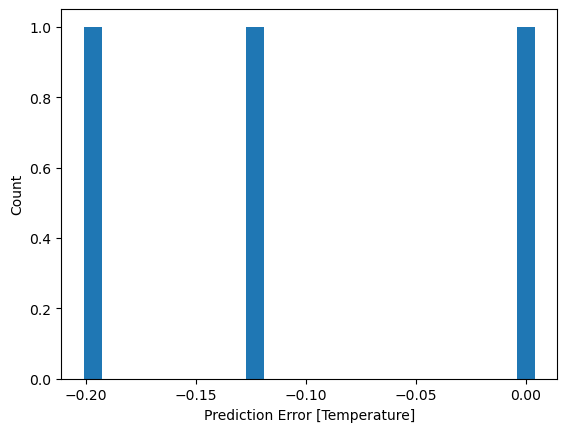

In [100]:
# original
plt.hist(ori_error_exit, bins=25)
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

#### Average error (AE)

AE: Provide a measure of bias

In [103]:
average_error_entrance = np.mean(error_entrance)
print("Average error:", average_error_entrance)

Average error: -3.524531279532973


In [104]:
# original
ori_average_error_entrance = np.mean(ori_error_entrance)
print("Average error:", ori_average_error_entrance)

Average error: -5.1500810953776055


In [105]:
average_error_exit = np.mean(error_exit)
print("Average error:", average_error_exit)

Average error: -0.17970559636488947


In [106]:
# original
ori_average_error_exit = np.mean(ori_error_exit)
print("Average error:", ori_average_error_exit)

Average error: -0.10792989095052026


#### Mean squared error (MSE) and mean absolute error (MAE)

MSE: Penalize significant errors more heavily \
MAE: Provide a measure of the average magnitude of errors

In [109]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_labels_entrance, test_predictions_entrance)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels_entrance, test_predictions_entrance)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 16.30774981409786
Mean Absolute Error: 3.524531279532973


In [110]:
# original
ori_mse = mean_squared_error(ori_test_labels_entrance, ori_test_predictions_entrance)
ori_mae = mean_absolute_error(ori_test_labels_entrance, ori_test_predictions_entrance)
print("Mean Squared Error:", ori_mse)
print("Mean Absolute Error:", ori_mae)

Mean Squared Error: 29.50322918731256
Mean Absolute Error: 5.1500810953776055


In [111]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_labels_exit, test_predictions_exit)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels_exit, test_predictions_exit)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.14690929787311363
Mean Absolute Error: 0.2329970111207489


In [112]:
# original
ori_mse = mean_squared_error(ori_test_labels_exit, ori_test_predictions_exit)
ori_mae = mean_absolute_error(ori_test_labels_exit, ori_test_predictions_exit)
print("Mean Squared Error:", ori_mse)
print("Mean Absolute Error:", ori_mae)

Mean Squared Error: 0.018831383168699787
Mean Absolute Error: 0.11064636230468732


In [113]:
import numpy as np

def mean_absolute_percentage_error(y_actual, y_pred):
    y_actual, y_pred = np.array(y_actual), np.array(y_pred)
    return np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

mape = mean_absolute_percentage_error(test_labels_entrance, test_predictions_entrance)
print(f'MAPE: {mape:.2f}%')

MAPE: 4.05%


In [114]:
mape = mean_absolute_percentage_error(ori_test_labels_entrance, ori_test_predictions_entrance)
print(f'MAPE: {mape:.2f}%')

MAPE: 5.89%


In [115]:
mape = mean_absolute_percentage_error(test_labels_exit, test_predictions_exit)
print(f'MAPE: {mape:.2f}%')

MAPE: 0.31%


In [116]:
mape = mean_absolute_percentage_error(ori_test_labels_exit, ori_test_predictions_exit)
print(f'MAPE: {mape:.2f}%')

MAPE: 0.15%


# Optuna

[I 2024-10-24 19:59:26,141] A new study created in memory with name: no-name-9c42f4f9-a4f3-40aa-9286-4f9467fa5dda
/var/folders/2z/b1lzf17n4z90pz80khfc42fw0000gp/T/ipykernel_6424/2090917937.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
[I 2024-10-24 19:59:31,796] Trial 0 finished with value: 35.21218395233154 and parameters: {'num_layers': 3, 'num_neurons_layer_0': 24, 'num_neurons_layer_1': 88, 'num_neurons_layer_2': 36, 'learning_rate': 0.00029688254797485846, 'activation': 'tanh'}. Best is trial 0 with value: 35.21218395233154.
/var/folders/2z/b1lzf17n4z90pz80khfc42fw0000gp/T/ipykernel_6424/2090917937.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

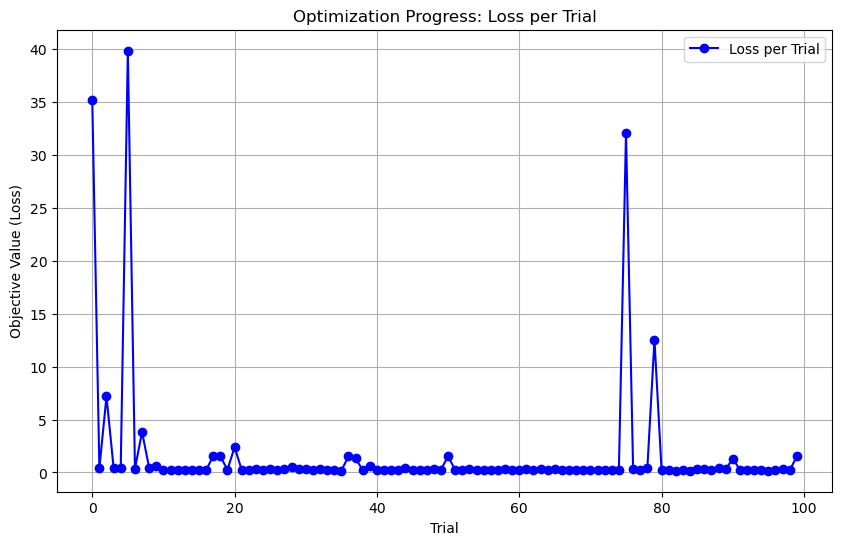

Best hyperparameters:  {'num_layers': 3, 'num_neurons_layer_0': 128, 'num_neurons_layer_1': 76, 'num_neurons_layer_2': 124, 'learning_rate': 0.0020152718027541413, 'activation': 'tanh'}
Best trial loss:  0.16556208208203316
Epoch 1/50
43/43 [==============================] - 0s 460us/step - loss: 71.4810
Epoch 2/50
43/43 [==============================] - 0s 434us/step - loss: 58.2108
Epoch 3/50
43/43 [==============================] - 0s 468us/step - loss: 46.7501
Epoch 4/50
43/43 [==============================] - 0s 481us/step - loss: 35.5258
Epoch 5/50
43/43 [==============================] - 0s 474us/step - loss: 24.4124
Epoch 6/50
43/43 [==============================] - 0s 468us/step - loss: 13.3999
Epoch 7/50
43/43 [==============================] - 0s 470us/step - loss: 5.1535
Epoch 8/50
43/43 [==============================] - 0s 470us/step - loss: 2.9875
Epoch 9/50
43/43 [==============================] - 0s 481us/step - loss: 2.9364
Epoch 10/50
43/43 [======================

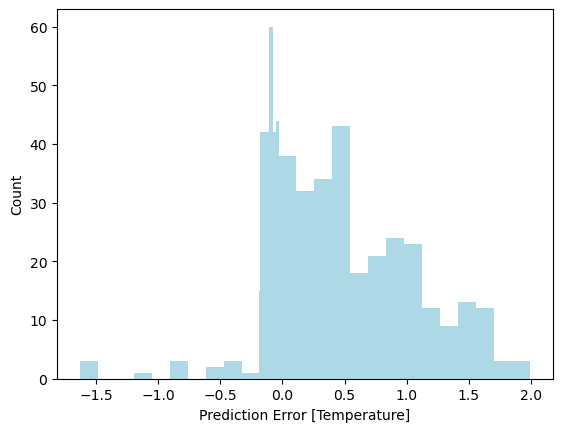

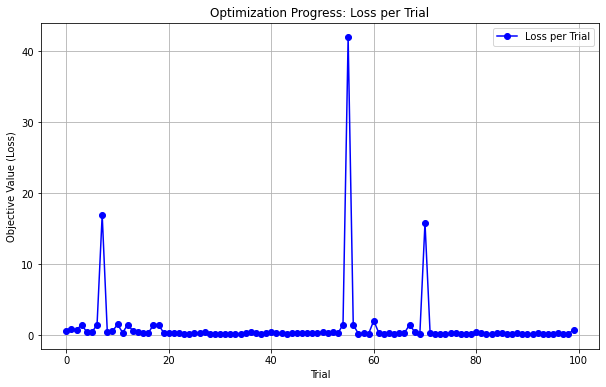

Best hyperparameters:  {'num_layers': 1, 'num_neurons_layer_0': 100, 'learning_rate': 0.0027491513753489564, 'activation': 'tanh'}
Best trial loss:  0.20058700069785118
Epoch 1/50
43/43 [==============================] - 0s 715us/step - loss: 78.1137
Epoch 2/50
43/43 [==============================] - 0s 643us/step - loss: 64.8663
Epoch 3/50
43/43 [==============================] - 0s 643us/step - loss: 52.6162
Epoch 4/50
43/43 [==============================] - 0s 643us/step - loss: 40.4349
Epoch 5/50
43/43 [==============================] - 0s 619us/step - loss: 28.3209
Epoch 6/50
43/43 [==============================] - 0s 643us/step - loss: 16.2468
Epoch 7/50
43/43 [==============================] - 0s 619us/step - loss: 6.1000
Epoch 8/50
43/43 [==============================] - 0s 595us/step - loss: 3.0265
Epoch 9/50
43/43 [==============================] - 0s 643us/step - loss: 2.9334
Epoch 10/50
43/43 [==============================] - 0s 645us/step - loss: 2.1299
Epoch 11/50
43

Epoch 49/50
43/43 [==============================] - 0s 619us/step - loss: 0.0938
Epoch 50/50
11/11 [==============================] - 0s 799us/step - loss: 0.4616
Test set loss for entrance: 0.4616129398345947
11/11 [==============================] - 0s 800us/step - loss: 0.1062
Test set loss for exit: 0.10615528374910355
1/1 [==============================] - 0s 15ms/step - loss: 1.0336
v2. Test set loss for entrance: 1.0335668325424194
1/1 [==============================] - 0s 15ms/step - loss: 0.1702
v2. Test set loss for exit: 0.17015838623046875
Test features Entrance: [[30.801  6.707 38.854  5.678]
 [29.503  6.682 39.698  5.676]
 [29.395  6.68  39.768  5.675]
 ...
 [ 7.877  2.515 36.767  2.167]
 [ 7.906  2.485 36.52   2.148]
 [ 7.935  2.455 36.273  2.129]]

v2. Test features Entrance: [[31.29  6.52 37.49  5.53]
 [11.87  3.93 40.75  3.44]
 [14.23  4.08 38.    3.52]]

Test result Entrance: {'dnn_model': 0.4616129398345947}

v2. Test result Entrance: {'dnn_model': 1.033566832542419

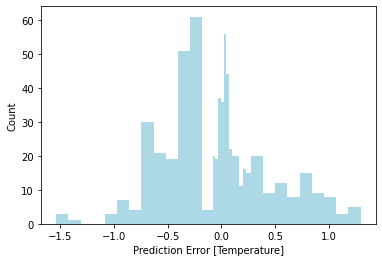

In [118]:
import optuna
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

trial_losses = []

# Function to create a model with the given hyperparameters
# Function to create a model with a specific number of neurons in each layer
def create_model(input_shape, neurons_per_layer, activation, learning_rate):
    model = tf.keras.Sequential()
    
    # Add the first layer with input shape
    model.add(layers.Dense(neurons_per_layer[0], activation=activation, input_shape=(input_shape,)))
    
    # Add subsequent layers with specified number of neurons
    for neurons in neurons_per_layer[1:]:
        model.add(layers.Dense(neurons, activation=activation))
    
    model.add(layers.Dense(1))  # Output layer
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                  loss='mean_absolute_error')
    return model

# Objective function to optimize both entrance and exit models
def objective(trial):
    # Suggest number of layers
    num_layers = trial.suggest_int('num_layers', 1, 5)
    
    # Suggest a different number of neurons for each layer
    neurons_per_layer = []
    for i in range(num_layers):
        neurons = trial.suggest_int(f'num_neurons_layer_{i}', 16, 128, step=4)  # Each layer can have 16 to 128 neurons
        neurons_per_layer.append(neurons)
    
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])

    # Create models for both entrance and exit
    model_entrance = create_model(train_features_entrance.shape[1], neurons_per_layer, activation, learning_rate)
    model_exit = create_model(train_features_exit.shape[1], neurons_per_layer, activation, learning_rate)

    # Split data into training and validation for both entrance and exit
    x_train_entrance, x_val_entrance, y_train_entrance, y_val_entrance = train_test_split(train_features_entrance, train_labels_entrance, test_size=0.2, random_state=42)
    x_train_exit, x_val_exit, y_train_exit, y_val_exit = train_test_split(train_features_exit, train_labels_exit, test_size=0.2, random_state=42)

    # Train both models
    model_entrance.fit(x_train_entrance, y_train_entrance, validation_data=(x_val_entrance, y_val_entrance), 
                       epochs=100, batch_size=32, verbose=0)
    model_exit.fit(x_train_exit, y_train_exit, validation_data=(x_val_exit, y_val_exit), 
                   epochs=100, batch_size=32, verbose=0)

    # Evaluate both models on validation data
    val_loss_entrance = model_entrance.evaluate(x_val_entrance, y_val_entrance, verbose=0)
    val_loss_exit = model_exit.evaluate(x_val_exit, y_val_exit, verbose=0)

    # Combine the two objectives by returning a weighted sum
    combined_loss = 0.5 * val_loss_entrance + 0.5 * val_loss_exit
    trial_losses.append(combined_loss)  # Append the loss to the list
    
    return combined_loss

# Create a study and optimize both models simultaneously
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(trial_losses, label='Loss per Trial', marker='o', color='blue')
plt.title('Optimization Progress: Loss per Trial')
plt.xlabel('Trial')
plt.ylabel('Objective Value (Loss)')
plt.legend()
plt.grid(True)
plt.show()

# Print best hyperparameters
print("Best hyperparameters: ", study.best_params)
print("Best trial loss: ", study.best_value)

# Build the final optimized models
def build_best_model(best_params, input_shape):
    num_layers = best_params['num_layers']
    
    # Reconstruct neurons per layer using the best parameters
    neurons_per_layer = [best_params[f'num_neurons_layer_{i}'] for i in range(num_layers)]
    activation = best_params['activation']
    learning_rate = best_params['learning_rate']

    model = create_model(input_shape, neurons_per_layer, activation, learning_rate)
    return model

# Create the final models using the best hyperparameters
final_model_entrance = build_best_model(study.best_params, train_features_entrance.shape[1])
final_model_exit = build_best_model(study.best_params, train_features_exit.shape[1])


# Train the final models on the full datasets
final_model_entrance.fit(train_features_entrance, train_labels_entrance, epochs=50, batch_size=32, verbose=1)
final_model_exit.fit(train_features_exit, train_labels_exit, epochs=50, batch_size=32, verbose=1)

#----------------------
# Optionally, evaluate on a test set (if you have one)
test_loss_entrance = final_model_entrance.evaluate(test_features_entrance, test_labels_entrance, verbose=1)
print(f"Test set loss for entrance: {test_loss_entrance}")
test_loss_exit = final_model_exit.evaluate(test_features_exit, test_labels_exit, verbose=1)
print(f"Test set loss for exit: {test_loss_exit}")

ori_test_loss_entrance = final_model_entrance.evaluate(ori_test_features_entrance, ori_test_labels_entrance, verbose=1)
print(f"v2. Test set loss for entrance: {ori_test_loss_entrance}")
ori_test_loss_exit = final_model_exit.evaluate(ori_test_features_exit, ori_test_labels_exit, verbose=1)
print(f"v2. Test set loss for exit: {ori_test_loss_exit}")

#----------------------
test_features_entrance = np.asarray(test_features_entrance).astype(np.float32)
print("Test features Entrance:", test_features_entrance)
print()

ori_test_features_entrance = np.asarray(ori_test_features_entrance).astype(np.float32)
print("v2. Test features Entrance:", ori_test_features_entrance)
print()

#----------------------
test_results_entrance = {}
test_results_entrance['dnn_model'] = final_model_entrance.evaluate(test_features_entrance, test_labels_entrance, verbose=0)
print("Test result Entrance:", test_results_entrance)
print()

ori_test_results_entrance = {}
ori_test_results_entrance['dnn_model'] = final_model_entrance.evaluate(ori_test_features_entrance, ori_test_labels_entrance, verbose=0)
print("v2. Test result Entrance:", ori_test_results_entrance)
print()

#----------------------
test_features_exit = np.asarray(test_features_exit).astype(np.float32)
print("Test features Exit:", test_features_exit)
print()

ori_test_features_exit = np.asarray(ori_test_features_exit).astype(np.float32)
print("v2. Test features Exit:", ori_test_features_exit)

#----------------------
test_results_exit = {}
test_results_exit['dnn_model'] = final_model_exit.evaluate(test_features_exit, test_labels_exit, verbose=0)
print("Test result Exit:", test_results_exit)
print()

ori_test_results_exit = {}
ori_test_results_exit['dnn_model'] = final_model_exit.evaluate(ori_test_features_exit, ori_test_labels_exit, verbose=0)
print("v2. Test result Exit:", ori_test_results_exit)
print()

#----------------------
pd.DataFrame(test_results_entrance, index=['Mean absolute error [Temperature]']).T

pd.DataFrame(test_results_exit, index=['Mean absolute error [Temperature]']).T

pd.DataFrame(ori_test_results_entrance, index=['Mean absolute error [Temperature]']).T

pd.DataFrame(ori_test_results_exit, index=['Mean absolute error [Temperature]']).T

#----------------------
test_predictions_entrance = final_model_entrance.predict(test_features_entrance).flatten()
print("Test Predictions Entrance:", test_predictions_entrance)
print()

test_predictions_exit = final_model_exit.predict(test_features_exit).flatten()
print("Test Predictions Exit:", test_predictions_exit)
print()

ori_test_predictions_entrance = final_model_entrance.predict(ori_test_features_entrance).flatten()
print("v2. Test Predictions Entrance:", ori_test_predictions_entrance)
print()

ori_test_predictions_exit = final_model_exit.predict(ori_test_features_exit).flatten()
print("v2. Test Predictions Exit:", ori_test_predictions_exit)
print()

#----------------------
error_entrance = test_predictions_entrance - test_labels_entrance
print("Error entrance:", error_entrance)
print()

error_exit = test_predictions_entrance - test_labels_entrance
print("Error exit:", error_exit)
print()

ori_error_entrance = ori_test_predictions_entrance - ori_test_labels_entrance
print("v2. Error entrance:", ori_error_entrance)
print()

ori_error_exit = ori_test_predictions_entrance - ori_test_labels_entrance
print("v2. Error exit:", ori_error_exit)
print()

#----------------------
plt.hist(error_entrance, bins=25, color='lightblue')
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

error_exit = test_predictions_exit - test_labels_exit
error_exit

plt.hist(error_exit, bins=25, color='lightblue')
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

# average error
average_error_entrance = np.mean(error_entrance)
print("Average error for entrance:", average_error_entrance)
print()

average_error_exit = np.mean(error_exit)
print("Average error for exit:", average_error_exit)
print()

ori_average_error_entrance = np.mean(ori_error_entrance)
print("v2. Average error for entrance:", ori_average_error_entrance)
print()

ori_average_error_exit = np.mean(ori_error_exit)
print("v2. Average error for exit:", ori_average_error_exit)
print()

# mean squared error
from sklearn.metrics import mean_squared_error
mse_entrance = mean_squared_error(test_labels_entrance, test_predictions_entrance)
mse_exit = mean_squared_error(test_labels_exit, test_predictions_exit)
print("Mean Squared Error for entrance:", mse_entrance)
print("Mean Squared Error for exit:", mse_exit)
print()

from sklearn.metrics import mean_squared_error
ori_mse_entrance = mean_squared_error(ori_test_labels_entrance, ori_test_predictions_entrance)
ori_mse_exit = mean_squared_error(ori_test_labels_exit, ori_test_predictions_exit)
print("v2. Mean Squared Error for entrance:", ori_mse_entrance)
print("v2. Mean Squared Error for exit:", ori_mse_exit)
print()

# mean absolute error
from sklearn.metrics import mean_absolute_error
mae_entrance = mean_absolute_error(test_labels_entrance, test_predictions_entrance)
mae_exit = mean_absolute_error(test_labels_exit, test_predictions_exit)
print("Mean Absolute Error for entrance:", mae_entrance)
print("Mean Absolute Error for exit:", mae_exit)
print()


from sklearn.metrics import mean_absolute_error
ori_mae_entrance = mean_absolute_error(ori_test_labels_entrance, ori_test_predictions_entrance)
ori_mae_exit = mean_absolute_error(ori_test_labels_exit, ori_test_predictions_exit)
print("v2. Mean Absolute Error for entrance:", ori_mae_entrance)
print("v2. Mean Absolute Error for exit:", ori_mae_exit)
print()


import numpy as np

def mean_absolute_percentage_error(y_actual, y_pred):
    y_actual, y_pred = np.array(y_actual), np.array(y_pred)
    return np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

mape = mean_absolute_percentage_error(test_labels_entrance, test_predictions_entrance)
print(f'MAPE for entrance: {mape:.2f}%')

mape = mean_absolute_percentage_error(test_labels_exit, test_predictions_exit)
print(f'MAPE for exit: {mape:.2f}%')

ori_mape = mean_absolute_percentage_error(ori_test_labels_entrance, ori_test_predictions_entrance)
print(f'v2. MAPE for entrance: {mape:.2f}%')

ori_mape = mean_absolute_percentage_error(ori_test_labels_exit, ori_test_predictions_exit)
print(f'v2. MAPE for exit: {mape:.2f}%')


[I 2024-10-24 20:08:44,848] A new study created in memory with name: no-name-18632748-1f79-4f76-9248-22e67f03bef2
/var/folders/2z/b1lzf17n4z90pz80khfc42fw0000gp/T/ipykernel_6424/2695465620.py:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
[I 2024-10-24 20:08:48,740] Trial 0 finished with value: 0.600098729133606 and parameters: {'num_layers': 2, 'num_neurons_layer_0': 40, 'num_neurons_layer_1': 20, 'learning_rate': 0.0041680748699093224, 'activation': 'relu'}. Best is trial 0 with value: 0.600098729133606.
/var/folders/2z/b1lzf17n4z90pz80khfc42fw0000gp/T/ipykernel_6424/2695465620.py:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sugge

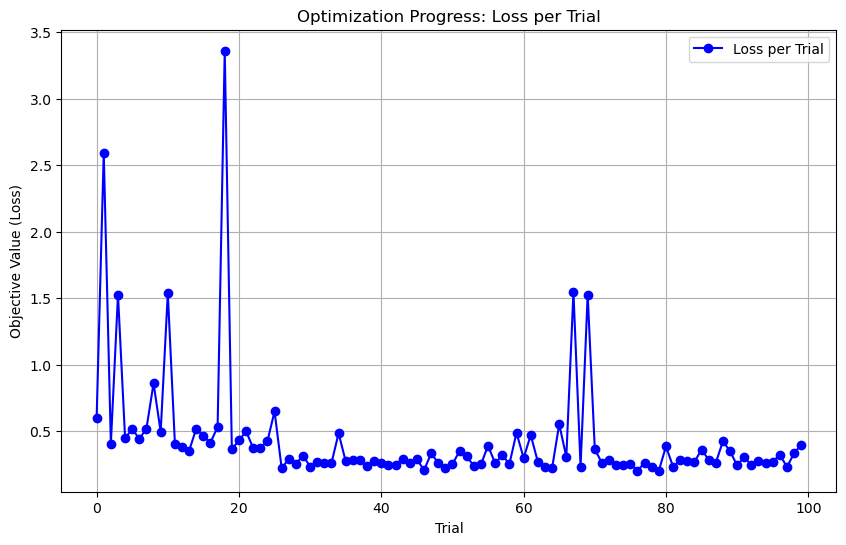

Best hyperparameters:  {'num_layers': 1, 'num_neurons_layer_0': 100, 'learning_rate': 0.002449807979404295, 'activation': 'tanh'}
Best trial loss:  0.2021159790456295
Epoch 1/50
43/43 [==============================] - 0s 413us/step - loss: 78.8495
Epoch 2/50
43/43 [==============================] - 0s 374us/step - loss: 66.3041
Epoch 3/50
43/43 [==============================] - 0s 316us/step - loss: 55.2445
Epoch 4/50
43/43 [==============================] - 0s 271us/step - loss: 44.3306
Epoch 5/50
43/43 [==============================] - 0s 313us/step - loss: 33.4913
Epoch 6/50
43/43 [==============================] - 0s 296us/step - loss: 22.6976
Epoch 7/50
43/43 [==============================] - 0s 290us/step - loss: 12.0126
Epoch 8/50
43/43 [==============================] - 0s 293us/step - loss: 4.6642
Epoch 9/50
43/43 [==============================] - 0s 280us/step - loss: 2.9505
Epoch 10/50
43/43 [==============================] - 0s 305us/step - loss: 2.9339
Epoch 11/50
43/

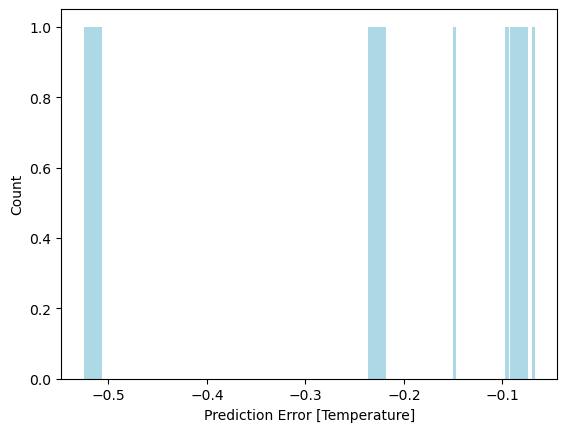

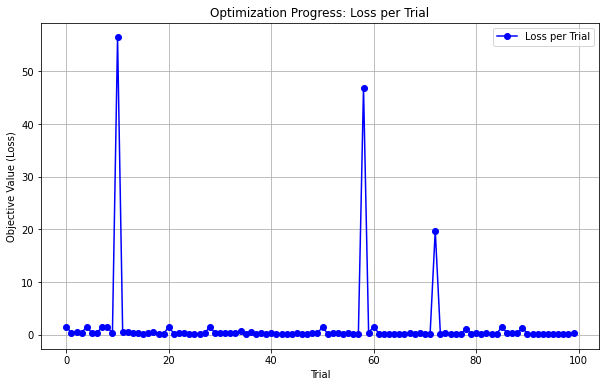

Best hyperparameters:  {'num_layers': 3, 'num_neurons_layer_0': 76, 'num_neurons_layer_1': 80, 'num_neurons_layer_2': 112, 'learning_rate': 0.0017124008594070982, 'activation': 'tanh'}
Best trial loss:  0.17320891469717026
Epoch 1/50
43/43 [==============================] - 0s 857us/step - loss: 73.1948
Epoch 2/50
43/43 [==============================] - 0s 881us/step - loss: 62.4490
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 53.5721
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 44.9052
Epoch 5/50
43/43 [==============================] - 0s 976us/step - loss: 36.3369
Epoch 6/50
43/43 [==============================] - 0s 1000us/step - loss: 27.8254
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 19.3506
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 10.9932
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 5.0731
Epoch 10/50
43/43 [==============================

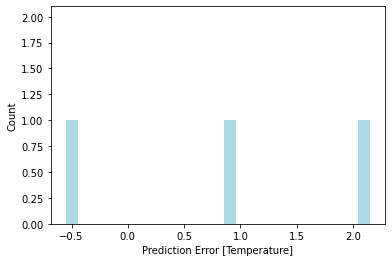

In [119]:
import optuna
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

ori_trial_losses = []

# Function to create a model with the given hyperparameters
# Function to create a model with a specific number of neurons in each layer
def create_model(input_shape, neurons_per_layer, activation, learning_rate):
    model = tf.keras.Sequential()
    
    # Add the first layer with input shape
    model.add(layers.Dense(neurons_per_layer[0], activation=activation, input_shape=(input_shape,)))
    
    # Add subsequent layers with specified number of neurons
    for neurons in neurons_per_layer[1:]:
        model.add(layers.Dense(neurons, activation=activation))
    
    model.add(layers.Dense(1))  # Output layer
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                  loss='mean_absolute_error')
    return model

# Objective function to optimize both entrance and exit models
def objective(trial):
    # Suggest number of layers
    num_layers = trial.suggest_int('num_layers', 1, 5)
    
    # Suggest a different number of neurons for each layer
    neurons_per_layer = []
    for i in range(num_layers):
        neurons = trial.suggest_int(f'num_neurons_layer_{i}', 16, 128, step=4)  # Each layer can have 16 to 128 neurons
        neurons_per_layer.append(neurons)
    
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])

    # Create models for both entrance and exit
    ori_model_entrance = create_model(train_features_entrance.shape[1], neurons_per_layer, activation, learning_rate)
    ori_model_exit = create_model(train_features_exit.shape[1], neurons_per_layer, activation, learning_rate)

    # Split data into training and validation for both entrance and exit
    ori_x_train_entrance, ori_x_val_entrance, ori_y_train_entrance, ori_y_val_entrance = train_test_split(train_features_entrance, train_labels_entrance, test_size=0.2, random_state=42)
    ori_x_train_exit, ori_x_val_exit, ori_y_train_exit, ori_y_val_exit = train_test_split(train_features_exit, train_labels_exit, test_size=0.2, random_state=42)

    # Train both models
    ori_model_entrance.fit(ori_x_train_entrance, ori_y_train_entrance, validation_data=(ori_x_val_entrance, ori_y_val_entrance), 
                       epochs=100, batch_size=32, verbose=0)
    ori_model_exit.fit(ori_x_train_exit, ori_y_train_exit, validation_data=(ori_x_val_exit, ori_y_val_exit), 
                   epochs=100, batch_size=32, verbose=0)

    # Evaluate both models on validation data
    ori_val_loss_entrance = ori_model_entrance.evaluate(ori_x_val_entrance, ori_y_val_entrance, verbose=0)
    ori_val_loss_exit = ori_model_exit.evaluate(ori_x_val_exit, ori_y_val_exit, verbose=0)

    # Combine the two objectives by returning a weighted sum
    ori_combined_loss = 0.5 * ori_val_loss_entrance + 0.5 * ori_val_loss_exit
    ori_trial_losses.append(ori_combined_loss)  # Append the loss to the list
    
    return ori_combined_loss

# Create a study and optimize both models simultaneously
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(ori_trial_losses, label='Loss per Trial', marker='o', color='blue')
plt.title('Optimization Progress: Loss per Trial')
plt.xlabel('Trial')
plt.ylabel('Objective Value (Loss)')
plt.legend()
plt.grid(True)
plt.show()

# Print best hyperparameters
print("Best hyperparameters: ", study.best_params)
print("Best trial loss: ", study.best_value)

# Build the final optimized models
def build_best_model(best_params, input_shape):
    num_layers = best_params['num_layers']
    
    # Reconstruct neurons per layer using the best parameters
    neurons_per_layer = [best_params[f'num_neurons_layer_{i}'] for i in range(num_layers)]
    activation = best_params['activation']
    learning_rate = best_params['learning_rate']

    model = create_model(input_shape, neurons_per_layer, activation, learning_rate)
    return model

# Create the final models using the best hyperparameters
ori_final_model_entrance = build_best_model(study.best_params, train_features_entrance.shape[1])
ori_final_model_exit = build_best_model(study.best_params, train_features_exit.shape[1])

# Train the final models on the full datasets
ori_final_model_entrance.fit(train_features_entrance, train_labels_entrance, epochs=50, batch_size=32, verbose=1)
ori_final_model_exit.fit(train_features_exit, train_labels_exit, epochs=50, batch_size=32, verbose=1)

# Optionally, evaluate on a test set (if you have one)
ori_test_loss_entrance = ori_final_model_entrance.evaluate(ori_test_features_entrance, ori_test_labels_entrance, verbose=1)
print(f"Test set loss for entrance: {ori_test_loss_entrance}")
ori_test_loss_exit = ori_final_model_exit.evaluate(ori_test_features_exit, ori_test_labels_exit, verbose=1)
print(f"Test set loss for exit: {ori_test_loss_exit}")


ori_test_features_entrance = np.asarray(ori_test_features_entrance).astype(np.float32)
print("Test features Entrance:", ori_test_features_entrance)
print()

ori_test_results_entrance = {}
ori_test_results_entrance['dnn_model'] = ori_final_model_entrance.evaluate(ori_test_features_entrance, ori_test_labels_entrance, verbose=0)
print("Test result Entrance:", ori_test_results_entrance)
print()

ori_test_features_exit = np.asarray(ori_test_features_exit).astype(np.float32)
print("Test features Exit:", ori_test_features_exit)
print()

ori_test_results_exit = {}
ori_test_results_exit['dnn_model'] = ori_final_model_exit.evaluate(ori_test_features_exit, ori_test_labels_exit, verbose=0)
print("Test result Exit:", ori_test_results_exit)
print()

pd.DataFrame(ori_test_results_entrance, index=['Mean absolute error [Temperature]']).T

pd.DataFrame(ori_test_results_exit, index=['Mean absolute error [Temperature]']).T

ori_test_predictions_entrance = ori_final_model_entrance.predict(ori_test_features_entrance).flatten()
print("Test Predictions Entrance:", ori_test_predictions_entrance)
print()

ori_test_predictions_exit = ori_final_model_exit.predict(ori_test_features_exit).flatten()
print("Test Predictions Exit:", ori_test_predictions_exit)
print()

ori_error_entrance = ori_test_predictions_entrance - ori_test_labels_entrance
print("Error entrance:", ori_error_entrance)
print()

ori_error_exit = ori_test_predictions_entrance - ori_test_labels_entrance
print("Error entrance:", ori_error_exit)
print()

plt.hist(ori_error_entrance, bins=25, color='lightblue')
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

ori_error_exit = ori_test_predictions_exit - ori_test_labels_exit
ori_error_exit

plt.hist(ori_error_exit, bins=25, color='lightblue')
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

# average error
ori_average_error_entrance = np.mean(ori_error_entrance)
print("Average error for entrance:", ori_average_error_entrance)
print()

ori_average_error_exit = np.mean(ori_error_exit)
print("Average error for exit:", ori_average_error_exit)
print()

# mean squared error
from sklearn.metrics import mean_squared_error
ori_mse_entrance = mean_squared_error(ori_test_labels_entrance, ori_test_predictions_entrance)
ori_mse_exit = mean_squared_error(ori_test_labels_exit, ori_test_predictions_exit)
print("Mean Squared Error for entrance:", ori_mse_entrance)
print("Mean Squared Error for exit:", ori_mse_exit)
print()

# mean absolute error
from sklearn.metrics import mean_absolute_error
ori_mae_entrance = mean_absolute_error(ori_test_labels_entrance, ori_test_predictions_entrance)
ori_mae_exit = mean_absolute_error(ori_test_labels_exit, ori_test_predictions_exit)
print("Mean Absolute Error for entrance:", ori_mae_entrance)
print("Mean Absolute Error for exit:", ori_mae_exit)
print()

import numpy as np

def mean_absolute_percentage_error(y_actual, y_pred):
    y_actual, y_pred = np.array(y_actual), np.array(y_pred)
    return np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

ori_mape = mean_absolute_percentage_error(ori_test_labels_entrance, ori_test_predictions_entrance)
print(f'MAPE for entrance: {ori_mape:.2f}%')

ori_mape = mean_absolute_percentage_error(ori_test_labels_exit, ori_test_predictions_exit)
print(f'MAPE for exit: {ori_mape:.2f}%')

In [120]:
print("Trial Losses (Objective Values) as a Column:")
for i, loss in enumerate(trial_losses):
    print(f"{i + 1}|{loss}")

Trial Losses (Objective Values) as a Column:
1|35.21218395233154
2|0.41268420219421387
3|7.1848883628845215
4|0.4403950870037079
5|0.406866118311882
6|39.85478973388672
7|0.37131811678409576
8|3.825786769390106
9|0.41180936992168427
10|0.6084505021572113
11|0.26812744140625
12|0.2620934471487999
13|0.22476675361394882
14|0.27170631289482117
15|0.2520553059875965
16|0.24775905534625053
17|0.2459508366882801
18|1.530828483402729
19|1.527335699647665
20|0.25528082996606827
21|2.4037650898098946
22|0.23025309666991234
23|0.25297911465168
24|0.2811254933476448
25|0.20581506937742233
26|0.307591550052166
27|0.2552456185221672
28|0.33648041635751724
29|0.5128492191433907
30|0.3604346923530102
31|0.328628271818161
32|0.21795573085546494
33|0.29584889486432076
34|0.19650382176041603
35|0.2683088667690754
36|0.16556208208203316
37|1.527197178453207
38|1.3295589685440063
39|0.22876622527837753
40|0.6495141983032227
41|0.2731059268116951
42|0.2664371356368065
43|0.2787623256444931
44|0.20029531419